<img src =  'https://camo.githubusercontent.com/7fa5735ef58c4e7b88d448f595d089c93f9bee00/68747470733a2f2f7777772e696e736169642e636f2f77702d636f6e74656e742f75706c6f6164732f323031392f30392f6c6f676f32782e706e67' />

# Letter Recognition

### Presented by: *Sheetal Kumari*
### Nov Cohort

# Table of Content

1. [Description of the Dataset](#section1)<br>
2. [Problem Statement](#section2)<br>
3. [Installing & Importing Libraries](#section3)<br>
4. [Data Preprocessing](#section4)<br>
5. [EDA](#section5)<br>
6. [Preparing x and y](#section6)<br>
    6.1 [Scaling](#section601)<br>
    6.2 [Splitting into X and y](#section602)<br>
7. [ Machine Learning Algorithm](#section7)<br>
    7.1 [Decision Tree Classifier](#section701)<br>
    7.2 [SVM](#section702)<br>
    7.3 [Naive Bayes](#section703)<br>
    7.4 [KNN](#section704)<br>
8. [Conclusion](#section8)<br>

<a id=section1></a>
## 1. Description of the Dataset

The objective is to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet. The character images were based on 20 different fonts, and each letter within these 20 fonts was randomly distorted to produce a file of 20,000 unique stimuli. Each stimulus was converted into 16 primitive numerical attributes (statistical moments and edge counts) which were then scaled to fit into a range of integer values from 0 through 15.

  
letter :  capital letter (26 values from A to Z)


x-box :   horizontal position of box 

y-box :   vertical position of box 

width :   width of box 

high :    height of box 

onpix :   total # on pixels 

x-bar :   mean x of on pixels in box 

y-bar :   mean y of on pixels in box 

x2bar :   mean x variance 

y2bar :   mean y variance 

xybar :   mean x y correlation 

x2ybr :   mean of x * x * y 

xy2br :   mean of x * y * y 

x-ege :   mean edge count left to right 

xegvy :   correlation of x-ege with y 

y-ege :   mean edge count bottom to top 

yegvx :   correlation of y-ege with x 

<a id=section2></a>
## 2. Problem Statement

To identify English Alphabet using Machine Learning Algorithm.

<a id=section3></a>
## 3. Installing and Importing Libraries

In [1]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

%matplotlib inline

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


from yellowbrick.classifier import ConfusionMatrix

<a id=section4></a>
## 4. Data Preprocessing

In [3]:
letters = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-4/master/Projects/LetterRecognition_train.csv')
letters.head()

,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,id
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,1
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,2
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,3
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,4
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7,5


In [4]:
letters.shape

(16000, 18)

In [5]:
letters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 18 columns):
letter    16000 non-null object
x-box     16000 non-null int64
y-box     16000 non-null int64
width     16000 non-null int64
high      16000 non-null int64
onpix     16000 non-null int64
x-bar     16000 non-null int64
y-bar     16000 non-null int64
x2bar     16000 non-null int64
y2bar     16000 non-null int64
xybar     16000 non-null int64
x2ybr     16000 non-null int64
xy2br     16000 non-null int64
x-ege     16000 non-null int64
xegvy     16000 non-null int64
y-ege     16000 non-null int64
yegvx     16000 non-null int64
id        16000 non-null int64
dtypes: int64(17), object(1)
memory usage: 2.2+ MB


In [6]:
letters.describe(include='all')

,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,id
count,16000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000
unique,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.020313,7.029063,5.117500,5.366000,3.500625,6.892688,7.512000,4.627562,5.170187,8.286625,6.471063,7.927062,3.049313,8.343937,3.682313,7.796125,8000.500000
std,NaN,1.908436,3.303998,2.003202,2.262656,2.192613,2.029576,2.333494,2.711330,2.384917,2.485706,2.641917,2.071988,2.342829,1.550055,2.571245,1.603464,4618.946489
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,NaN,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.000000,7.000000,1.000000,8.000000,2.000000,7.000000,4000.750000
50%,NaN,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,3.000000,8.000000,8000.500000
75%,NaN,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,8.000000,12000.250000


<a id=section5></a>
## 5. EDA

In [7]:
letters.isnull().sum()

letter    0
x-box     0
y-box     0
width     0
high      0
onpix     0
x-bar     0
y-bar     0
x2bar     0
y2bar     0
xybar     0
x2ybr     0
xy2br     0
x-ege     0
xegvy     0
y-ege     0
yegvx     0
id        0
dtype: int64

In [8]:
letters[letters.duplicated(keep='first')]
letters.drop_duplicates(inplace=True)

Number of instances: 16000

Number of attributes: 17 (letter category and 16 numeric features)

Attribute characteristics: Integer

Associated Tasks: Classification

Missing Attribute Values: None

In [9]:
letters.letter.value_counts()

M    648
U    646
T    644
Y    641
D    638
P    635
A    633
B    630
V    628
X    628
F    622
N    617
E    616
Q    615
O    614
W    613
G    609
L    604
J    599
R    597
C    594
K    593
I    590
S    587
H    583
Z    576
Name: letter, dtype: int64

In [10]:
letters.drop('id',axis=1, inplace=True)

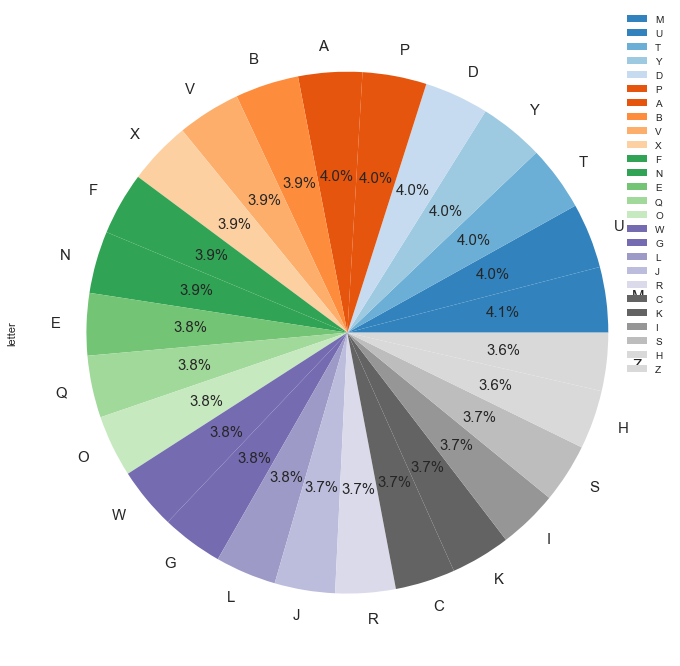

In [11]:
letters['letter'].value_counts().plot(kind='pie', autopct= '%3.1f%%',figsize=(12,12), legend=True, cmap='tab20c', fontsize=15)

In [12]:
letters_mean = letters.groupby('letter').mean()
letters_mean.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
letter,,,,,,,,,,,,,,,,
A,3.320695,6.917852,5.110585,5.146919,2.963665,8.832543,3.612954,2.715640,2.026856,7.793049,2.336493,8.477093,2.763033,6.298578,2.856240,7.472354
B,4.003175,7.017460,5.115873,5.200000,4.633333,7.680952,7.052381,5.388889,5.569841,7.931746,5.514286,6.668254,3.152381,7.934921,6.668254,9.104762
C,4.047138,7.074074,4.671717,5.277778,2.740741,5.422559,7.676768,5.919192,7.161616,8.907407,7.562290,11.867003,1.944444,8.900673,4.062290,8.523569
D,4.098746,7.429467,5.239812,5.380878,4.095611,7.537618,6.786834,5.921630,6.514107,8.147335,5.070533,5.757053,3.402821,7.810345,3.992163,7.639498
E,3.743506,6.943182,4.759740,5.176948,3.659091,5.983766,7.344156,4.233766,7.589286,8.545455,6.256494,10.326299,2.115260,8.300325,6.022727,8.461039


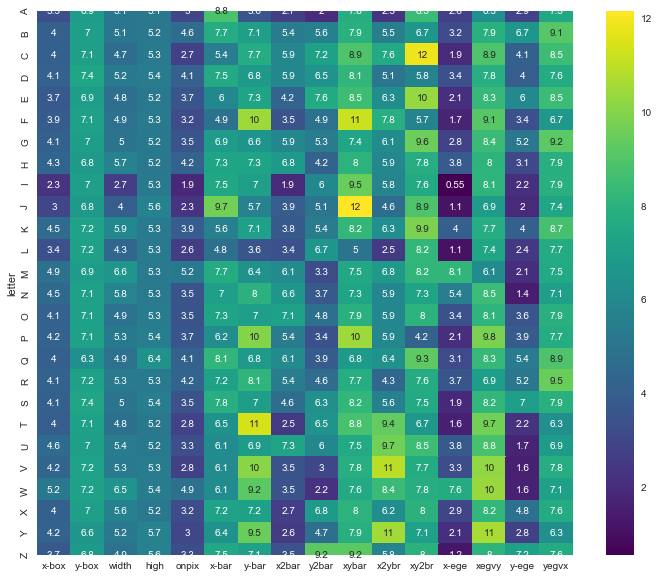

In [13]:
plt.figure(figsize=(12, 10))

sns.heatmap(letters_mean, cmap = 'viridis', annot=True)


<a id=section6></a>
## 6. Preparing X and y

In [14]:
x = letters.drop("letter", axis = 1)
col = x.columns
col
y = letters['letter']

In [15]:
col

Index(['x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar',
       'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx'],
      dtype='object')

In [16]:
x.shape

(16000, 16)

In [17]:
y.shape

(16000,)

<a id=section601></a>
### 6.1. Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x)
X = scaler.transform(x)

In [19]:
X

array([[ 0.51336182,  1.50456915, -1.05709051, ..., -0.22189426,
         0.12355783,  1.37448945],
       [-0.01064387,  1.20189603,  0.44055838, ..., -0.86705293,
        -0.265371  ,  0.75082003],
       [ 1.56137319,  1.20189603,  0.44055838, ...,  1.06842308,
        -0.65429982,  0.1271506 ],
       ...,
       [-0.01064387, -0.00879644, -0.05865792, ..., -0.22189426,
         0.51248665,  0.1271506 ],
       [-1.05865523, -1.82483514, -1.05709051, ...,  0.42326441,
         0.12355783,  1.37448945],
       [-0.01064387,  0.89922291,  0.44055838, ..., -0.22189426,
         0.51248665, -1.12018824]])

In [20]:
X= pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.513362,1.504569,-1.057091,0.722183,-0.684422,1.531063,-1.076531,0.137368,-0.490677,1.896251,-1.313884,0.517846,-0.447897,-0.221894,0.123558,1.374489
1,-0.010644,1.201896,0.440558,1.164155,1.139943,1.531063,-0.647976,-0.969135,0.347953,0.689313,-1.313884,-0.447440,-0.021049,-0.867053,-0.265371,0.750820
2,1.561373,1.201896,0.440558,0.280210,-0.228331,-0.932582,0.637690,-0.231466,0.347953,-1.724564,-0.935359,1.000489,1.259494,1.068423,-0.654300,0.127151
3,-1.058655,-1.824835,-1.057091,-1.929651,-1.140513,0.545605,-0.647976,0.506202,0.347953,-0.919939,-0.556834,0.517846,-0.874744,-0.867053,0.512487,1.374489
4,-0.010644,1.201896,-0.058658,1.164155,-0.228331,0.545605,0.209135,0.506202,1.605897,-1.322251,-0.178309,-0.930084,-1.301592,-0.221894,2.068202,-0.496519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,-0.010644,-0.311470,0.440558,-0.603734,1.139943,0.545605,-0.647976,0.875036,-0.909992,-0.517626,-0.556834,-0.447440,0.405799,-0.867053,1.290344,-0.496519
15996,2.085379,2.109915,0.939775,1.164155,0.227761,0.545605,-1.505086,0.137368,-0.909992,-0.115313,-0.935359,-1.412727,0.405799,-0.867053,0.512487,0.127151
15997,-0.010644,-0.008796,-0.058658,-0.161762,-0.228331,0.052876,-0.219420,-0.969135,1.605897,1.091626,-0.178309,0.517846,-0.447897,-0.221894,0.512487,0.127151
15998,-1.058655,-1.824835,-1.057091,-1.487678,-1.140513,-0.439853,0.209135,0.875036,0.767268,-0.115313,0.578741,2.448419,-0.874744,0.423264,0.123558,1.374489


In [21]:
X.columns = col
X.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,0.513362,1.504569,-1.057091,0.722183,-0.684422,1.531063,-1.076531,0.137368,-0.490677,1.896251,-1.313884,0.517846,-0.447897,-0.221894,0.123558,1.374489
1,-0.010644,1.201896,0.440558,1.164155,1.139943,1.531063,-0.647976,-0.969135,0.347953,0.689313,-1.313884,-0.447440,-0.021049,-0.867053,-0.265371,0.750820
2,1.561373,1.201896,0.440558,0.280210,-0.228331,-0.932582,0.637690,-0.231466,0.347953,-1.724564,-0.935359,1.000489,1.259494,1.068423,-0.654300,0.127151
3,-1.058655,-1.824835,-1.057091,-1.929651,-1.140513,0.545605,-0.647976,0.506202,0.347953,-0.919939,-0.556834,0.517846,-0.874744,-0.867053,0.512487,1.374489
4,-0.010644,1.201896,-0.058658,1.164155,-0.228331,0.545605,0.209135,0.506202,1.605897,-1.322251,-0.178309,-0.930084,-1.301592,-0.221894,2.068202,-0.496519


<a id=section602></a>
### 6.2. Splitting into X & y

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [23]:
print(X_train.shape)
print(X_test.shape)

(12800, 16)
(3200, 16)


In [24]:
print(y_train.shape)
print(y_test.shape)

(12800,)
(3200,)


<a id=section7></a>
## 7. Machine Learning Algorithm

<a id=section701></a>
### 7.1. Decision Tree

Accuracy:  0.8615625
[[114   0   1   0   0   0   0   0   3   0   2   2   0   1   0   0   0   0
    2   0   1   0   0   0   1   1]
 [  0  98   0   1   0   1   0   3   2   0   2   0   0   0   0   1   1   4
    1   0   0   3   1   1   0   0]
 [  0   1  92   1   0   0   3   0   0   0   2   1   0   0   0   0   0   0
    0   0   1   0   0   0   0   0]
 [  0   1   0 123   0   3   0   4   0   0   0   2   2   3   1   1   2   8
    0   1   1   0   0   2   0   4]
 [  0   0   3   0  76   0   0   1   0   0   1   3   0   0   0   1   1   1
    1   0   0   1   0   6   0   1]
 [  0   0   0   0   0 115   0   1   0   1   0   1   0   0   1   3   1   0
    1   1   0   0   0   1   0   0]
 [  2   2   3   2   5   3  85   5   0   0   0   1   0   0   0   0   3   0
    0   1   0   1   1   1   0   0]
 [  0   4   0   3   0   0   0  97   0   0   3   0   1   3   0   2   0   0
    0   0   0   0   0   0   1   0]
 [  2   0   0   0   1   2   0   0  95   1   0   1   0   0   0   1   0   0
    2   0   0   0   0   1   0   0

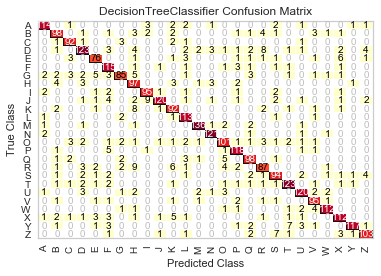

In [25]:
dec_tree = DecisionTreeClassifier()

cm = ConfusionMatrix(dec_tree, classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))

# train the model using the training sets
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

# predict the responses for test dataset
predictions = cm.predict(X_test)

# accuracy classification score
print("Accuracy: ", metrics.accuracy_score(y_test, predictions))

# compute confusion matrix
print(metrics.confusion_matrix(y_test, predictions))

# text report showing the main classification metrics
print(classification_report(y_test, predictions, digits=5))
cm.poof()


<a id=section702></a>
## 7.2 SVM

In [26]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

In [27]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# confusion metrix
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.856875 

[[118   0   0   0   0   0   0   0   0   3   3   0   0   0   0   0   0   1
    0   0   1   0   0   1   1   0]
 [  1 105   0   0   0   0   1   1   1   0   0   0   0   0   0   0   0   7
    3   0   0   0   0   0   0   0]
 [  0   0  93   0   4   0   0   1   0   0   3   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   7   0 137   0   0   0   1   0   1   2   0   0   4   0   0   0   4
    0   0   2   0   0   0   0   0]
 [  0   0   2   0  87   0   1   0   0   0   0   0   0   0   0   0   0   0
    2   1   0   0   0   2   0   1]
 [  0   0   0   1   2 108   0   0   0   4   0   0   0   2   0   3   0   0
    2   4   0   0   0   0   0   0]
 [  0   2   7   4   0   0  82   3   0   0   2   2   2   0   0   0   5   1
    3   0   0   2   0   0   0   0]
 [  0   5   0   8   0   1   3  75   0   0   6   0   0   0   6   1   1   6
    0   0   2   0   0   0   0   0]
 [  0   0   0   2   0   3   1   0  92   4   0   1   0   0   1   0   0   0
    1   0   0   0   0   0   0   1

In [28]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

C:\Users\sheet\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [29]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# confusion metrix
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.94 

[[121   0   2   0   0   0   0   1   0   0   2   0   1   0   0   0   0   0
    0   0   0   0   0   1   0   0]
 [  1 117   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1
    0   0   0   0   0   0   0   0]
 [  0   0  94   0   2   0   3   1   0   0   1   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   2   0 149   0   0   0   2   0   0   0   0   0   2   1   0   0   1
    0   0   1   0   0   0   0   0]
 [  0   0   0   0  91   0   1   0   0   0   0   0   0   0   0   0   0   0
    1   0   0   0   0   2   0   1]
 [  0   0   0   1   0 119   0   1   0   0   0   0   0   1   0   0   0   0
    1   2   0   0   0   1   0   0]
 [  0   1   0   3   1   0 106   0   0   0   0   0   0   0   4   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   4   0   2   0   0   1  99   0   0   2   0   0   0   1   0   0   4
    0   0   1   0   0   0   0   0]
 [  1   0   1   1   0   2   0   0  97   4   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [

<a id=section703></a>
## 7.3 Naive Bayes

Accuracy:  0.655625
[[110   0   0   2   0   0   0   0   0   0   4   0   4   3   0   0   1   0
    2   0   0   0   0   0   2   0]
 [  0  87   0   2   0   0   0   0  14   1   1   0   1   0   1   0   1   7
    3   0   0   0   0   1   0   0]
 [  0   0  84   0   3   0   6   1   0   0   6   0   0   0   0   0   0   0
    1   0   0   0   0   0   0   0]
 [  2  12   0 100   0   1   0   0  12   6   4   0   1   1   4   0   0  10
    3   0   0   0   0   2   0   0]
 [  0   2   2   0  31   0  13   0   8   0   1   0   0   0   0   0   2   1
    9   3   1   0   0  23   0   0]
 [  0   6   0   3   0  97   0   2   0   0   0   0   0   2   0   2   4   1
    3   3   0   0   0   2   1   0]
 [  2   5  19   3   1   0  56   2   1   0   2   0   4   0   2   0   8   1
    2   0   0   0   5   2   0   0]
 [  0   9   0   2   0   0   2  43   2   0   3   0   3   2  22   0   0   7
    0   0   1   1   0  16   1   0]
 [  0   3   0   5   1   1   0   0  80   3   0   1   0   0   0   2   2   0
    8   0   0   0   0   0   0   0]

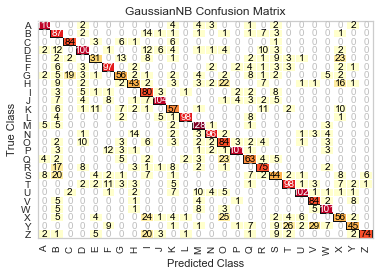

In [30]:

gaussianNB = GaussianNB()

cm = ConfusionMatrix(gaussianNB, classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))

# train the model using the training sets
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

# predict the responses for test dataset
predictions = cm.predict(X_test)

# accuracy classification score
print("Accuracy: ", accuracy_score(y_test, predictions))

# compute confusion matrix
print(confusion_matrix(y_test, predictions))

# text report showing the main classification metrics
print(classification_report(y_test, predictions, digits=5))

cm.poof()

<a id=section704></a>
## 7.4 KNN

Accuracy:  0.9528125
[[124   0   1   1   0   0   0   0   1   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   1]
 [  0 114   0   1   0   0   0   0   0   0   0   0   0   1   0   0   0   2
    0   0   0   0   0   1   0   0]
 [  0   0  96   0   1   0   3   0   0   0   0   0   0   0   0   0   0   0
    0   1   0   0   0   0   0   0]
 [  0   5   0 145   1   0   0   2   0   0   0   0   0   1   3   0   0   0
    1   0   0   0   0   0   0   0]
 [  0   1   1   0  91   0   0   0   0   0   0   1   0   0   0   0   0   0
    0   0   0   0   0   2   0   0]
 [  0   0   0   0   0 118   0   1   0   0   0   0   0   0   0   2   1   0
    0   2   0   0   0   1   1   0]
 [  0   2   1   2   0   0 108   0   0   0   0   1   0   0   0   0   0   1
    0   0   0   0   0   0   0   0]
 [  0   3   0   3   0   0   0 103   0   0   2   0   0   0   0   0   0   2
    0   0   1   0   0   0   0   0]
 [  0   0   0   1   0   1   0   0 100   4   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0

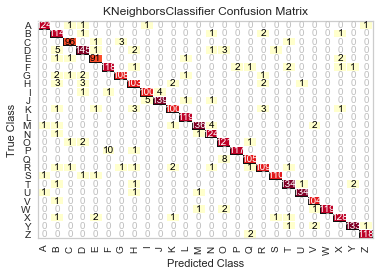

In [31]:

# Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan', algorithm='auto', weights='distance', n_jobs=-1)

cm = ConfusionMatrix(knn, classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))

# train the model using the training sets
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

# predict the responses for test dataset
predictions = cm.predict(X_test)

# accuracy classification score
print("Accuracy: ", accuracy_score(y_test, predictions))

# compute confusion matrix
print(confusion_matrix(y_test, predictions))

# text report showing the main classification metrics
print(classification_report(y_test, predictions, digits = 5))

cm.poof()

<a id=section8></a>
## 8 Conclusion

After applying algorithms the highest accuracy turns out to be 94% in KNN algorithm.
